In [14]:
# import delle Librerie
import numpy as np
import matplotlib.pyplot as plt

# Esercizio 1
Generalizzare il codice deil notebook precedente: completare il confronto tra soluzione reale e soluzione numerica per vari valori di $\theta$ del **Theta Metodo**.

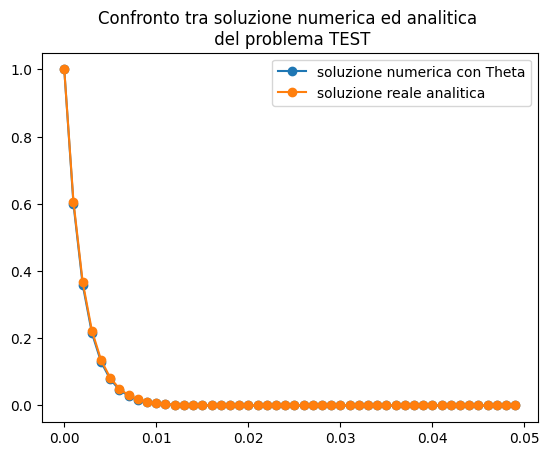

In [15]:
# Parametri e problema test
k = 500.0
theta = 0.5
h = 0.001
tf = 0.05
times = np.arange(0,tf,h)

f = lambda t,y: -k *y
sol_real = lambda y0,t0,t: y0*np.exp(-k*(t-t0))

y_real = sol_real(1,0,times)


# Metodo Theta
from scipy import optimize

u_Theta = np.zeros(len(times))
u_n = 1.0
u_Theta[0] = u_n

for i in range(0,len(times)-1):
    u_n1 = optimize.newton(lambda u_n1 :  u_n1 - h*((1-theta)*f(times[i+1],u_n1)+theta*f(times[i],u_n)) - u_n , u_n)
    u_Theta[i+1] = u_n1
    u_n = u_n1
#end    

# Grafico della soluzione ottenuta:
plt.figure(); plt.title('Confronto tra soluzione numerica ed analitica \n del problema TEST')
plt.plot(times,u_Theta,'-o',label='soluzione numerica con Theta');
plt.plot(times,y_real,'-o',label='soluzione reale analitica');
plt.legend();

# Esercizio 2
Un altro metodo tra i più semplici è il metodo di Heun che ha il seguente schema:

\begin{cases}
u_{n+1}^* = u_n + h f(t_n,u_n)\\
u_{n+1} = u_n + \frac{h}{2} \left[f(t_n,u_n) + f(t_n+h, u_{n+1}^*) \right]
\end{cases}

Iplementarlo prendendo spunto dal notebook precedente ed utilizzarlo per risolvere il problema test.

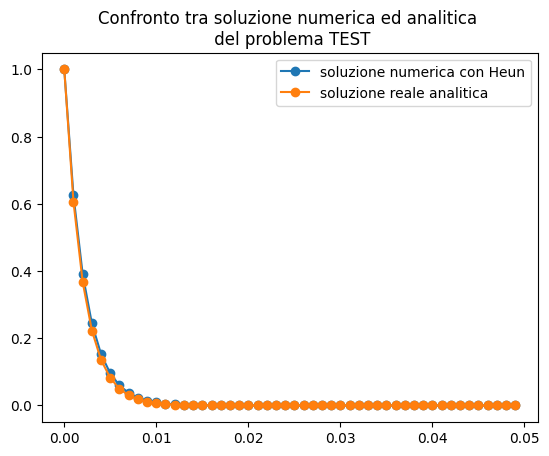

In [16]:
# Parametri e problema test
k = 500.0
theta = 0.5
h = 0.001
tf = 0.05
times = np.arange(0,tf,h)

f = lambda t,y: -k *y
sol_real = lambda y0,t0,t: y0*np.exp(-k*(t-t0))

y_real = sol_real(1,0,times)


# Metodo Theta
from scipy import optimize

u_H = np.zeros(len(times))
u_n = 1.0
u_H[0] = u_n

for i in range(0,len(times)-1):
    u_n1_s = u_n + h*f(times[i],u_n)
    u_n1 = u_n + h*0.5*(f(times[i+1],u_n1_s)+f(times[i],u_n))

    u_H[i+1] = u_n1
    u_n = u_n1
#end    

# Grafico della soluzione ottenuta:
plt.figure(); plt.title('Confronto tra soluzione numerica ed analitica \n del problema TEST')
plt.plot(times,u_H,'-o',label='soluzione numerica con Heun');
plt.plot(times,y_real,'-o',label='soluzione reale analitica');
plt.legend();